# Forest plot example

In [1]:
# %%%%%%%% imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import plot_misc.forest as forest
import plot_misc.example_data.examples as examples
%matplotlib inline
from IPython.core.display import display


/home/amand/google_drive/Research/plot-misc/plot_misc/table/layout.py:24: FutureWarning: The `layout.py` module will be moved to the `data-clean` package in the near future.
  FutureWarning)


In [2]:
# import example data
combined = examples.load_forest_data()

# constants
CMTOINCH = 1/2.54
SHAPE_DICT = {'PGS only': 'o', 'PGS plus': 's', 'PGS extended': 'H'}
COL_DICT = {'wo T2DM/CVD': 'orangered', 'w T2DM': 'blueviolet',
              'w T2DM & CVD': 'limegreen'}
STRING_COL = 'string'

# add y-axis values
combined.sort_values(['evaluated_outcome','subgroup_name'],  inplace=True)
sort_dict = {'CVD + AF + HF': 0, 'CVD': 1, 'CHD': 2, 'Ischaemic Stroke': 5,
             'HF': 3, 'AF': 4}
combined = forest._assign_distance(combined, group='evaluated_outcome', strata='model',
                            sort_dict=sort_dict, between_pad=6)

# add colours and shape
combined['col'] = combined.subgroup_name.map(COL_DICT)
combined['shape'] = combined.model.map(SHAPE_DICT)

# select a single 'study'
single = combined[combined.model=='PGS only'].copy()
single[STRING_COL] = \
single['test_cstatistic'].map('{:,.2f}'.format) + ' (' + \
single['test_cstatistic_lb'].map('{:,.2f}'.format) + ';' + \
single['test_cstatistic_ub'].map('{:,.2f}'.format) + ')'


## Complex forest plot
We will start with a rather complex forest plot with multiple values on the same line and the confidence interval 
presented within the shape.

/home/amand/google_drive/Research/plot-misc/plot_misc/forest.py:286: RuntimeWarning: `a_col` not found in `df`, creating `a_col` column with value 1.
  'with value {1}.'.format(a_col_name, a_col), RuntimeWarning)


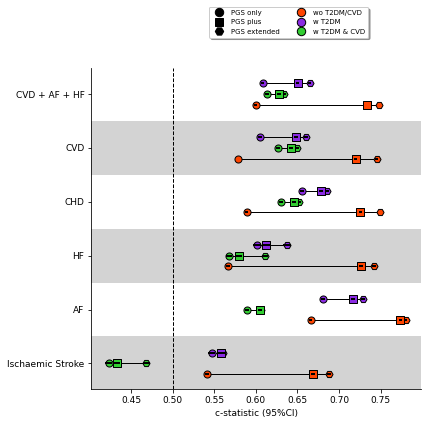

In [3]:
# figure
f, ax = plt.subplots(1, figsize=(15*CMTOINCH, 15*CMTOINCH))
_, ax = forest.plot_forest(df=combined, x_col='test_cstatistic', lb_col='test_cstatistic_lb',
                           ub_col='test_cstatistic_ub', s_col='shape', c_col='col', shape_size= 50,
                           ci_colour='black', g_col='evaluated_outcome', connect_shape=True, 
                           ax=ax, 
                           kwargs_scatter_dict={'edgecolors':'black'},
                           kwargs_connect_segments_dict={'zorder':1},
                          )

# change format
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('c-statistic (95%CI)', fontsize=9)
ax.tick_params('both', labelsize=9)
ax.axvline(0.5, linewidth=1, linestyle='--', c='black')

# legend
SHAPE_val = list(SHAPE_DICT.values())
SHAPE_key = list(SHAPE_DICT.keys())
COL_val = list(COL_DICT.values())
COL_key = list(COL_DICT.keys())
leg_handles = []

for i in range(len(SHAPE_key)):
    leg_handles = leg_handles +  [
        Line2D([0], [0], marker=SHAPE_val[i], color='black',
               markersize=14, lw=0.0, label=SHAPE_key[i]
              )
    ]

for i in range(len(COL_key)):
    leg_handles = leg_handles +  [
        Line2D([0], [0], marker='o', color=COL_val[i],
               markersize=14, markeredgecolor='black', lw=0,
               label=COL_key[i]
              )
    ]

ax.legend(handles=leg_handles , ncol=2, bbox_to_anchor=(0.85, 1.20),
          fancybox=True, shadow=True, fontsize='x-small', markerscale=0.6
         )



## Classic forest plot
Next we will use the same function to depict a more classical forest plot with a single estimate and confidence interval on each line. Note that due to the study sample size the confidence are very small and plotting the confidence interval _on top_ of the shape will usually look better. 

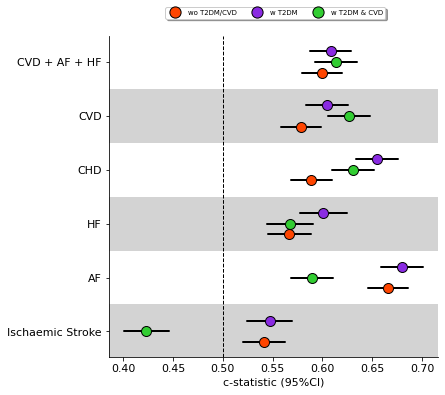

In [4]:
# increasing the ci to better showcase the function
single['test_cstatistic_lb'] = single['test_cstatistic_lb'] - 0.02
single['test_cstatistic_ub'] = single['test_cstatistic_ub'] + 0.02

# figure
f, ax = plt.subplots(1, figsize=(15*CMTOINCH, 15*CMTOINCH))
_, ax = forest.plot_forest(df=single, x_col='test_cstatistic', lb_col='test_cstatistic_lb',
                           ub_col='test_cstatistic_ub', s_col='shape', c_col='col', ci_colour='black',
                           g_col='evaluated_outcome', shape_size= 100, ci_lwd=2,
                           ax=ax, 
                           kwargs_scatter_dict={'edgecolors':'black'},
                           # plotting the confidence intervals behind the dots, and rounding the lines ends
                           kwargs_plot_ci_dict={'zorder':1, 'solid_capstyle':'round',
                                               'linestyle':'-'} 
                          )

# change format
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('c-statistic (95%CI)', fontsize=11)
ax.tick_params('both', labelsize=11)
ax.axvline(0.5, linewidth=1, linestyle='--', c='black')
#ax.set_xlim([0.55, 0.60])

# legend
COL_val = list(COL_DICT.values())
COL_key = list(COL_DICT.keys())
leg_handles = []

for i in range(len(COL_key)):
    leg_handles = leg_handles +  [
        Line2D([0], [0], marker='o', color=COL_val[i],
               markersize=14, markeredgecolor='black', lw=0,
               label=COL_key[i]
              )
    ]

ax.legend(handles=leg_handles , ncol=3, bbox_to_anchor=(0.85, 1.10),
          fancybox=True, shadow=True, fontsize='x-small', markerscale=0.8
         )



## Add side table

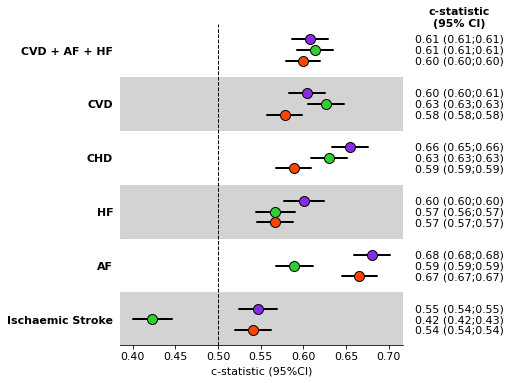

In [5]:
# create subplot and remove space
f, ax = plt.subplots(1, ncols=2, figsize=(18*CMTOINCH, 15*CMTOINCH),
                     gridspec_kw={'width_ratios': [10,4]},
                     sharey=False,
                     )
plt.subplots_adjust(wspace=0)

# add forest plot
_, _ = forest.plot_forest(df=single, x_col='test_cstatistic',
                           lb_col='test_cstatistic_lb',
                           ub_col='test_cstatistic_ub',
                           s_col='shape', c_col='col', ci_colour='black',
                           g_col='evaluated_outcome', shape_size= 100, ci_lwd=2,
                           ax=ax[0],
                           kwargs_scatter_dict={'edgecolors':'black'},
                           kwargs_plot_ci_dict={'zorder':1, 'solid_capstyle':'round',
                                               'linestyle':'-'}
                          )
ax[0].spines[['right', 'left', 'top']].set_visible(False)
ax[0].set_xlabel('c-statistic (95%CI)', fontsize=11)
ax[0].tick_params('both', labelsize=11, left=False)
ax[0].yaxis.set_ticklabels(ax[0].yaxis.get_ticklabels(),
                           weight='bold', size=11,
                          )
ax[0].axvline(0.5, linewidth=1, linestyle='--', c='black')

# add side-table
ax[1].set_ylim(ax[0].get_ylim())
_ = forest.plot_table(single, annoteheader='c-statistic\n(95% CI)',
                  string_col=STRING_COL, ax=ax[1],
                  halignment_text='center',
                  halignment_header='center',
                  pad_header=1,
                  size_text=11, size_header=11,
                  negative_padding=1.2,
                  )


In [6]:
help(forest)

Help on module plot_misc.forest in plot_misc:

NAME
    plot_misc.forest - A module to draw forest plots.

DESCRIPTION
    Aside from the plotting functions the moduel contains fuctions to
    appropriatly orrientate input DataFrames.

FUNCTIONS
    order_row(data: pandas.core.frame.DataFrame, order_outer: Dict[str, List[str]], order_inner: Union[Dict[str, List[str]], NoneType] = None) -> pandas.core.frame.DataFrame
        Order a data frame by and outer and inner order, say by study and within
        study by outcome.
        
        Parameters
        ----------
        data : pd.DataFrame,
        oder_outer : dict,
            The dictionary key will be used to select the `data` column, and the
            dictionary value should contain a list of string to order the column.
        order_inner : dict, default `NoneType`
            The dictionary key will be used to select the `data` column, and the
            dictionary value should contain a list of string to order the colum